In [2]:
import imp
import sys
sys.path.append('/Users/kook/insight/windsite/src')
# import wind
# imp.reload(wind)
# import wind
import seaborn as sns
#import transdist

import roads
imp.reload(roads)
import roads

import pandas as pd
import numpy as np
import geopandas as gpd
import requests
from shapely.geometry import Point
from matplotlib import pyplot as plt
%matplotlib inline
import time

import gmaps
import os
gmaps.configure(api_key=os.environ["GOOGLE_API_KEY"])
import json

print('Libraries loaded.')

Libraries loaded.


In [3]:
from shapely.geometry import LineString
from shapely.geometry.multilinestring import MultiLineString
from geopy.distance import distance
def line_len(geo):
    if type(geo) == LineString:
        return sum(distance(lonlat1[::-1],lonlat2[::-1]).miles for lonlat1,lonlat2 in zip(geo.coords,geo.coords[1:]))
    if type(geo) == MultiLineString:
        return sum(line_len(gline) for gline in geo.geoms)
    print(type(geo))
    return np.nan

Index(['OBJECTID_1', 'OBJECTID', 'OWNER', 'STATUS', 'VOLTAGE', 'VOLT_CLASS',
       'SUB_1', 'SUB_2', 'Shape__Len', 'geometry'],
      dtype='object')
4694


/Users/kook/opt/anaconda3/envs/insight_h5py/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


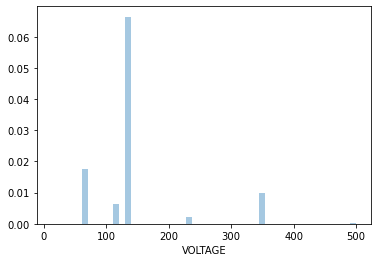

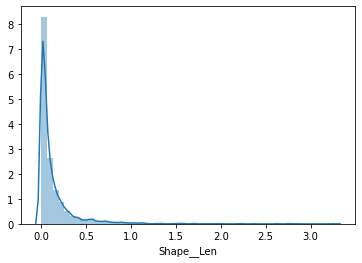

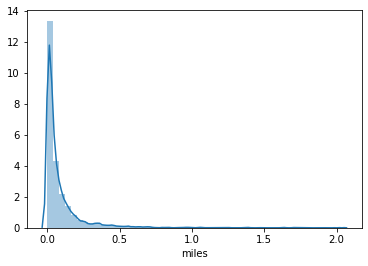

In [8]:
import geopandas as gpd
from geopy.distance import Distance
trans_gdf = gpd.read_file('../data/Texas_Wind_Energy_Infrastructure-shp/b3c3dc7e-f95e-4d06-a0d5-5fdfab452b992020329-1-1sykhqe.oide.shx')
print(trans_gdf.columns)
print(len(trans_gdf))
sns.distplot(trans_gdf['VOLTAGE'][trans_gdf['VOLTAGE'] > -0.8]); plt.show()
sns.distplot(trans_gdf['Shape__Len']); plt.show()
trans_gdf['miles'] = [Distance(x).miles for x in trans_gdf['Shape__Len']]
sns.distplot(trans_gdf['miles']); plt.show()

In [9]:
trans_miles = trans_gdf['geometry'].apply(line_len)

In [12]:
#fpd.DataFrame({'OBJECTID' : trans_gdf['OBJECTID'],'length_miles' : trans_miles}).to_pickle('../data/Texas_Wind_Energy_Infrastructure-shp//TX-trans-lengths.pkl',protocol = 3)

In [ ]:
plt.plot(
    [x[0] for x in trans_gdf['geometry'].iloc[4].coords],
    [x[1] for x in trans_gdf['geometry'].iloc[4].coords],marker='o'
); plt.show()
plt.plot([distance(x1[::-1,x2[::-1]]) for x1,x2 in zip(trans_gdf['geometry'].iloc[4],trans_gdf['geometry'].iloc[4][1:])])

In [13]:
test = pd.concat([trans_gdf.set_index('OBJECTID'),pd.read_pickle(
    '../data/Texas_Wind_Energy_Infrastructure-shp/TX-trans-lengths.pkl'
).set_index('OBJECTID')],axis=1)[['VOLTAGE','geometry','length_miles']]

In [25]:
long_df = test[test['length_miles'] > 5]
print(len(test),len(long_df))

4694 1946


In [34]:
#long_df.to_pickle('../data/long-trans-data-TX.pkl',protocol=3)
#long_df.to_file("../data/long-trans-data-TX.geojson", driver='GeoJSON')

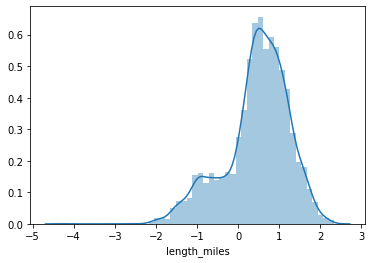

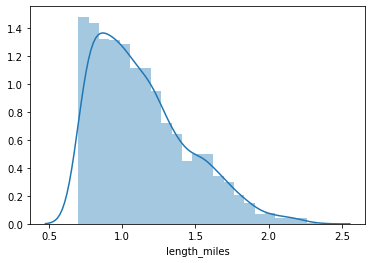

In [26]:
sns.distplot(np.log10(test['length_miles'])); plt.show()
sns.distplot(np.log10(long_df['length_miles'])); plt.show()

In [27]:
long_df.to_file("test.geojson", driver='GeoJSON')

In [28]:
import json
with open('test.geojson','r') as f : 
    test_geojson = json.load(f)

In [35]:
long_df['geometry'].iloc[0].bounds

(-100.24378088418, 35.3715537803827, -99.9952330919336, 35.3826419733484)

In [30]:
trans_layer = gmaps.geojson_layer(test_geojson,stroke_color=(255,0,255))

In [127]:
imp.reload(transdist)
import transdist

In [37]:
nrel_us = pd.read_csv('../data/nrel-techno-sites.csv')
print(len(nrel_us))
nrel_state = nrel_us[(nrel_us.State == 'Texas')]
print(len(nrel_state))
point_list = list(zip(nrel_state['latitude'],nrel_state['longitude']))
nrel_state.head()

126692
7869


,site_id,longitude,latitude,State,County,fraction_of_usable_area,power_curve,capacity,wind_speed,capacity_factor,full_timeseries_directory,full_timeseries_path
169,169,-97.460358,25.896492,Texas,Cameron,0.0049,2,2,7.46,0.433,0,0/169.nc
251,251,-97.738098,26.032654,Texas,Cameron,0.5680,2,10,7.45,0.414,0,0/251.nc
288,288,-97.208252,26.059063,Texas,Cameron,0.0801,2,2,8.18,0.506,0,0/288.nc
367,367,-98.073364,26.078449,Texas,Hidalgo,0.9851,2,16,7.17,0.363,0,0/367.nc
494,494,-98.311340,26.143227,Texas,Hidalgo,0.9475,2,16,7.06,0.358,0,0/494.nc


In [94]:
transdist.get_tx('../data/long-trans-data-TX.geojson')

In [128]:
%time trans_idx_list,trans_point_list,trans_dist_list = \
list(zip(*[transdist.find_closest_trans_point_2(latlon) for latlon in point_list[:20]]))

CPU times: user 26 s, sys: 30.7 ms, total: 26 s
Wall time: 26 s


In [150]:
i = 1000
while i < len(point_list):
    if i%100 == 0:
        print(i)
    latlon = point_list[i]
    trans_list.append(transdist.find_closest_trans_point_2(latlon))
    i_list.append(i)
    i = i + 1

1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800


In [151]:
# import pickle as pkl
# with fopen('../data/trans-tx.pkl','wb') as f:
#     pkl.dump(trans_list,f)

In [156]:
trans_df = pd.DataFrame({
    'site_id' : nrel_state['site_id'],
    'trans_idx' : [x[0] for x in trans_list],
    'latitude' : [x[1][0] for x in trans_list],
    'longitude': [x[1][1] for x in trans_list],
    'distance': [x[2] for x in trans_list]
})
trans_df

,site_id,trans_idx,latitude,longitude,distance
169,169,833,25.888472,-97.424833,2.279919
251,251,882,26.087197,-97.785635,4.778612
288,288,848,26.084680,-97.267434,4.080237
367,367,885,26.078824,-98.075022,0.106241
494,494,884,26.103226,-98.213942,6.649775
...,...,...,...,...,...
27791,27791,644,36.081104,-102.532032,36.307250
27965,27965,644,36.081104,-102.532032,38.899448
27966,27966,644,36.081104,-102.532032,38.092980
27967,27967,644,36.081104,-102.532032,35.838002


In [157]:
#ftrans_df.to_pickle('../data/trans-df-tx.pkl',protocol=3)

In [135]:
2*500/60/60q

0.2777777777777778

In [62]:
points_layer = gmaps.symbol_layer(point_list[:4],fill_color='red',stroke_color='red')
trans_points_layer = gmaps.symbol_layer(trans_point_list[:4],fill_color='blue',stroke_color='blue')

In [82]:
long_df.iloc[test2].to_file("test2.geojson", driver='GeoJSON')
import json
with open('test2.geojson','r') as f : 
    test2_geojson = json.load(f)
test2_layer = gmaps.geojson_layer(test2_geojson,stroke_color=(0,255,255))

In [125]:
test_i = 3600
test, test2 = transdist.find_closest_trans_point_2(point_list[test_i])[1:3]
test_layer = gmaps.symbol_layer(test,fill_color=(255,200,0),stroke_color=(255,200,0))
testlast_layer = gmaps.symbol_layer(test[:-1],fill_color=(255,0,0),stroke_color=(0,0,255))
points_layer = gmaps.symbol_layer([point_list[test_i]],fill_color='red',stroke_color='red')
len(test)

15

In [160]:
fig = gmaps.figure(
    layout={
        'width': '800px',
        'height': '600px',
    },
    map_type='SATELLITE')
fig.add_layer(trans_layer)
fig.add_layer(points_layer)
#fig.add_layer(trans_points_layer)
#fig.add_layer(test2_layer)
fig.add_layer(test_layer)
fig.add_layer(testlast_layer)
fig

Figure(layout=FigureLayout(height='600px', width='800px'))

In [95]:
transdist.special_gdf

,OBJECTID,VOLTAGE,length_miles,geometry,radius,center
0,1,230,14.301466,"LINESTRING (-100.24378 35.37285, -100.24357 35...",7.027440,"(35.37709787686555, -100.1195069880568)"
1,3,-999999,6.600788,"LINESTRING (-94.40841 33.48118, -94.40748 33.4...",3.196112,"(33.527523111502454, -94.40641163523875)"
2,6,-999999,35.612051,"LINESTRING (-94.03885 32.60065, -94.04034 32.6...",17.386733,"(32.7249855298084, -94.2984054303663)"
3,7,-999999,5.520766,"LINESTRING (-93.70949 30.11253, -93.72817 30.1...",2.504527,"(30.1038705343477, -93.7501052782859)"
4,8,-999999,46.771211,"LINESTRING (-94.03591 32.41970, -94.03665 32.4...",22.386251,"(32.580915819759355, -94.36710066826119)"
...,...,...,...,...,...,...
1941,15533,69,9.255959,"LINESTRING (-101.51489 33.96512, -101.50459 33...",4.466629,"(33.960471654343394, -101.4373505861605)"
1942,15536,345,8.179190,"LINESTRING (-100.35214 32.43783, -100.35195 32...",4.051820,"(32.4509182253459, -100.284535004037)"
1943,15539,345,34.871356,"LINESTRING (-100.19485 30.69594, -100.19582 30...",15.925805,"(30.87156501876065, -100.368973981864)"
1944,15589,-999999,23.701372,"LINESTRING (-94.42779 32.30071, -94.42773 32.3...",11.637856,"(32.328206988961455, -94.23155667779841)"
